A french cake shop claims that the average number of pastries they can produce in a day exceeds 500. The average number of pastries produced per day over a 70 day period was found to be 530. Assume that the population standard
deviation for the pastries produced per day is 125. Test the claim using a z-test with the critical z-value = 1.64 at the
alpha (significance level) = 0.05, and state your interpretation.

In [34]:
import pandas as pd
from  scipy.stats import stats,norm
from  scipy.stats import ttest_1samp
from  scipy.stats import ttest_ind
import numpy as np
import math
from scipy.stats import f_oneway 


In [3]:
# H0 -> Pastries produced in a day is 500 (u = 500)
# Ha -> Pastries produced in a day is greater than 500 (u > 500)

# Given data
sample = 70
sigma = 125
sample_sigma = sigma/math.sqrt(sample)
mean = 500 # AS we assumed in the null hypiothesis
z_critical = 1.64
x = 530
alpha = 0.05

# z = (530 - 500)/125/sqrt(70)
z = (x - mean)/sample_sigma

# p_value = P(X>500 | H0) -> 1 - norm.cdf(500)
p_value = 1- norm.cdf(z)
p_value
print("z value is " + str(z) )


print("p value is: "+str(p_value))
if p_value < alpha:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")




z value is 2.007984063681781
p value is: 0.022322492581293485
Reject null hypothesis


In [4]:
# What is critical sample mean
x_critical = mean + z_critical * sample_sigma
print("x_critical : "+ str(x_critical) )

#Similarly
z_critical= norm.ppf(0.95)
print("z_critical: " + str(z_critical)) # Given in the question

#  alpha is got by this equation
p_critical_or_alpha = 1-norm.cdf( (x_critical - mean)/sample_sigma) # The alpha at x critical
p_critical_or_alpha

x_critical : 524.502186491355
z_critical: 1.6448536269514722


0.05050258347410408

## IQ improvement with a pill
* Population IQ = 100
Rechearcher claims the pill will increase IQ

In [5]:
# The pill is given to few people and their IQ is tested

iq_score = [110,105,98,102,99,104,115,95]
sample_avg = np.mean(iq_score)

In [7]:
t_test , p_value = ttest_1samp(iq_score,100)
t_test , p_value
if p_value < alpha:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")
    print()

Failed to reject null hypothesis


In [9]:
df_iq = pd.read_csv('./LECTURE_NOTES/iq_two_schools.csv') 
df_iq .head()

,School,iq
0,school_1,91
1,school_1,95
2,school_1,110
3,school_1,112
4,school_1,115


In [10]:
df_iq.groupby("School")["iq"].mean()

School
school_1    101.153846
school_2    109.416667
Name: iq, dtype: float64

In [19]:


iq_1 = df_iq[df_iq["School"] == 'school_1']["iq"]
iq_2 = df_iq[df_iq["School"] == 'school_2']["iq"]

* H0 : m1 = m2
* Ha : m1 != m2

In [22]:
t_stat,p_value = ttest_ind(iq_1,iq_2)
t_stat,p_value
print("p value is: "+str(p_value))
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")



p value is: 0.02004552710936216
Reject null hypothesis


## CRICKET

In [24]:
df = pd.read_csv("./LECTURE_NOTES/Sachin_ODI.csv")
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


# Batting pattern 1st vs 2nd innings

In [25]:
df.groupby("Inns")["runs"].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [30]:
df_first_innings = df[df["Inns"]==1]["runs"]
df_second_innings = df[df["Inns"]==2]["runs"]

### H0 -> m1 = m2
### H1 -> m1 != m2

In [35]:
alpha = 0.05 # 5% significance level
t_stat,p_value = ttest_ind(df_first_innings,df_second_innings)
print(p_value)
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")
    print("No difference in 1st and 2nd innings")

0.14483724194759964
Failed to reject null hypothesis
No difference in 1st and 2nd innings


### H0 -> m1 = m2
### H1 -> m1 > m2

In [65]:
### H0 -> m1 = m2
### H1 -> m1 > m2
alpha = 0.05 # 5% significance level
t_stat,p_value = ttest_ind(df_first_innings,df_second_innings,alternative='greater')
print(p_value)
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")
    print("No difference in 1st and 2nd innings")

0.07241862097379982
Failed to reject null hypothesis
No difference in 1st and 2nd innings


AS we see both with alternative and without alternative, the p_value reduces than before as in two sided we take both sides, but here we take greater so it is divided by 2
* Hence p_value reduces

# Batting pattern won vs lost

In [88]:
df_won_innings = df[df["Won"]==True]
df_lost_innings = df[df["Won"]==False]


In [89]:
won_mean = df_won_innings["runs"].mean()
lost_mean = df_lost_innings["runs"].mean()
won_mean, lost_mean

(51.0, 35.13068181818182)

### H0 -> m1 = m2
### H1 -> m1 != m2

In [75]:
# Ha m1>m2 
# H0 m1=m2
alpha = 0.05 # 5% significance level
t_stat,p_value = ttest_ind(df_won_innings,df_lost_innings)
print(p_value)
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")


0.00032706154973653116
Reject null hypothesis


### H0 -> m1 = m2
### H1 -> m1 > m2

In [90]:
# Ha m1>m2 
# H0 m1=m2
alpha = 0.05 # 5% significance level
t_stat,p_value = ttest_ind(df_first_innings,df_second_innings,alternative="greater")
print(p_value)
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")


0.00016353077486826558
Reject null hypothesis


In [93]:
# Ha m1>m2 
# H0 m1=m2
alpha = 0.05 # 5% significance level
t_stat,p_value = ttest_ind(df_first_innings,df_second_innings,alternative="less")
print(p_value)
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")


0.9998364692251317
Failed to reject null hypothesis


# AEROFIT

In [51]:
df_aerofit = pd.read_csv("./LECTURE_NOTES/aerofit.csv")
df_aerofit


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


<Axes: xlabel='Gender', ylabel='Income'>

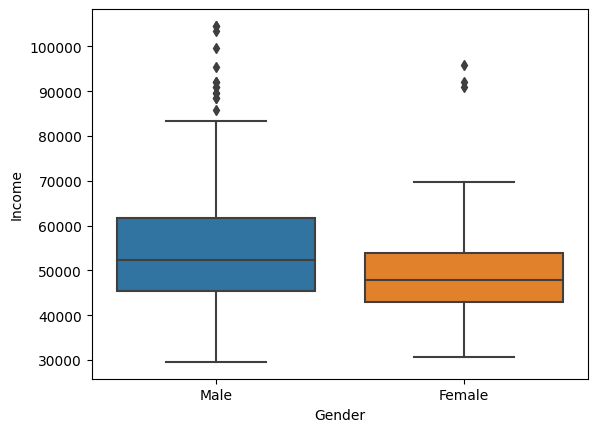

In [53]:
import seaborn as sns
sns.boxplot(x = 'Gender', y='Income',data=df_aerofit)

In [57]:
income_male = df_aerofit[df_aerofit["Gender"] == 'Male']["Income"]
income_female = df_aerofit[df_aerofit["Gender"] == 'Female']["Income"]

print("Income male "+ str(income_male.mean()) )
print("Income Female "+ str(income_female.mean()) )


Income male 56562.75961538462
Income Female 49828.90789473684


* H0 -> Men and women have the same income (m1=m2)
* Ha -> Men and women have different incomes (m1!=m2)

In [61]:
t_test,p_value= ttest_ind(income_male,income_female)
print(p_value)
if p_value < 0.05:
    print("Reject null hypothesis")
    print("Men and women have different incomes ")
else:
    print("Failed to reject null hypothesis")
    print("Men and women have the same incomes")

0.006527263097214258
Reject null hypothesis
Men and women have different incomes 


In [22]:

t_test , p_value = ttest_1samp([14.3,12.6,13.7,10.9,13.7,12.0,11.4,12.0,12.6,13.1],12.0,alternative="greater")
print(p_value)
if p_value<0.05:
    print("Reject H0")

0.04979938002326665
Reject H0


In [23]:

t_test , p_value = ttest_1samp([177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5],175.3,alternative="two-sided")
print(p_value)
if p_value<0.05:
    print("Reject H0")

0.04734137339747033
Reject H0


In [31]:

t_test , p_value = ttest_1samp([886,633,943,847,934,841,1193,820,774,834,1050,1058,1192,975,1313,872,1079,809],947.39,alternative="greater")
print(p_value)
if p_value<0.05:
    print("Reject H0")

0.5000107750426449


In [42]:
healthcare = [9.7,9.5,7.6,6.8,6.7,6.7,6.6,4.6,3.9,3.9,3.7,3.3,3.0,0.8,-9.9]
technology = [6.5,6.5,6.4,6.2,4.9,4.6,4.6,4.2,3.6,3.2,2.9,2.8,2.7,2.5,4.4]

t_test , p_value = ttest_ind(healthcare,technology)
print(p_value)

if p_value<0.20:
    print("Reject H0")



0.9625559973822339


In [43]:
healthcare = [9.7,9.5,7.6,6.8,6.7,6.7,6.6,4.6,3.9,3.9,3.7,3.3,3.0,0.8,-9.9]
technology = [6.5,6.5,6.4,6.2,4.9,4.6,4.6,4.2,3.6,3.2,2.9,2.8,2.7,2.5,4.4]
x_stat,p_value=f_oneway(healthcare,technology) # p-value is fairly low
print(p_value)
if p_value < 0.20:
    print("Reject null hypothesis")

0.9625559973822471


In [49]:
school_1 = [115, 111, 112, 101, 95, 98, 100, 90, 89, 108]
school_2 = [82, 71, 64, 65.2, 67.8, 64.7,95,77]

t_test , p_value = ttest_ind(school_1,school_2)
print(t_test)
if p_value<0.10:
    print("Reject H0")

6.038968847980341
Reject H0


In [ ]:
school_1 = [85, 74, 63.5, 69.4, 71.6, 65,90,78]
school_2 = [107, 103, 91, 99, 104, 98, 117, 113, 92, 96, 108, 115, 116, 88]

t_test , p_value = ttest_ind(school_1,school_2)
print(p_value)
if p_value<0.05:
    print("Reject H0")

In [ ]:
{'total_bill': {100: 11.35, 101: 15.38, 102: 44.3, 103: 22.42, 104: 20.92, 105: 15.36, 106: 20.49, 107:25.21, 108: 18.24, 109: 14.31, 110: 14.0, 111: 7.25, 112: 38.07, 113: 23.95, 114: 25.71,115:17.31, 116: 29.93, 117: 10.65, 118: 12.43, 119: 24.08}, 'tip': {100: 2.5, 101: 3.0, 102: 2.5, 103: 3.48, 104: 4.08, 105: 1.64, 106: 4.06, 107: 4.29, 108: 3.76, 109: 4.0, 110: 3.0, 111: 1.0, 112: 4.0, 113: 2.55, 114: 4.0, 115: 3.5, 116: 5.07, 117: 1.5, 118: 1.8, 119: 2.92}, 'sex': {100: 'Female',101: 'Female', 102: 'Female' 103: 'Female' 104: 'Female' 105: 'Male' 106: 'Male' 107: 'Male'.108: 'Male', 109: 'Female', 110: 'Male', 111: 'Female', 112: 'Male', 113: 'Male', 114: 'Female',115: 'Female', 116: 'Male', 117: 'Female', 118: 'Female', 119: 'Female'},
'smoker': {100: 'Yes',101: 'Yes', 102: 'Yes', 103: 'Yes', 104: 'No', 105: 'Yes', 106: 'Yes', 107: 'Yes', 108: 'No', 109: 'Yes',110: 'No', 111: 'No', 112: 'No', 113: 'No', 114: 'No', 115: 'No', 116: 'No', 117: 'No', 118: 'No', 119:'No'}
'N}

df.groupby("smoker")["percentage"].mean()[0]

In [46]:

t_test , p_value = ttest_1samp([13000,9000,15000,3000,14000,6000],10000,alternative="greater")
print(p_value)
if p_value<0.05:
    print("Reject H0")

0.5


In [45]:
np.mean([13000,9000,15000,3000,14000,6000])

10000.0